In [69]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [70]:
# 코로나 이후 식계를 알아보기 위해 확진자 데이터 추가하고, 데이터 정리
train = pd.read_csv("train.csv") 
covid_data = pd.read_csv("covid.csv") 
train_covid = pd.merge(left = train , right = covid_data, on = "일자")
train_covid.loc[train_covid['확진자'] == "-", '확진자'] = 0
train_covid['확진자'] = train_covid['확진자'].astype(int)
train_covid

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,확진자
0,2020-01-20,월,2821,132,199,488,0.0,모닝롤/핫도그 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 오징어국 명엽채...,쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 닭갈비 (닭:국내산) 고등어구이 (고등어:국...,쌀밥/잡곡밥 (쌀:국내산) 만두국 간장불고기 (돈육:국내산) 옥수수전 물파래무침...,1075.0,439.0,0
1,2020-01-21,화,2821,96,237,491,0.0,와플/모닝에그빵 우유/주스 스크램블에그 표고버섯죽/쌀밥 (쌀:국내산) 동태탕 봄...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 등갈비김치찜 (등갈비:스페인산) 콩나물냉채 땅...,스팸주먹밥 (쌀:국내산) 해물칼국수 감자만두 딸기드레싱샐러드 무피클 포기김치...,868.0,478.0,0
2,2020-01-22,수,2821,130,232,5,0.0,모닝롤/크로와상 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 재첩국 딤섬 ...,"불고기비빔밥 (쌀:국내산,소고기:호주) 미역장국 허니버터치킨 (닭:국내산) 모듬묵...",쌀밥/잡곡밥 (쌀:국내산) 된장찌개 주꾸미삼겹살볶음 (삼겹:독일산) 셀프무쌈말이 ...,782.0,354.0,0
3,2020-01-23,목,2821,481,141,38,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 땅콩죽/쌀밥 (쌀:국내산) 피바지락배추국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱국 돼지갈비찜 (돼지갈비:국내산) 동태전 (동태:러...,"쌀밥/잡곡밥 (쌀:국내산) 뼈감자탕 (등뼈:국내산) 해물파전 고추,양파/쌈장 부...",685.0,117.0,0
4,2020-01-28,화,2821,284,143,670,0.0,베이글/팬케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 김치두부국 쥐포...,쌀밥/잡곡밥 (쌀:국내산) 황태국 (황태:러시아산) 오리고추장볶음 (오리:국내산) ...,오므라이스 (쌀:국내산) 미소장국 깐풍육 (돈육:국내산) 감자튀김 단무지무침 ...,1042.0,639.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,373
233,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,381
234,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,314
235,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,405


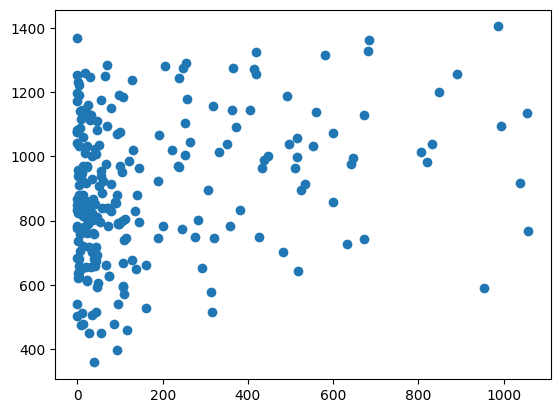

In [71]:
plt.scatter(train_covid["확진자"], train_covid["중식계"])

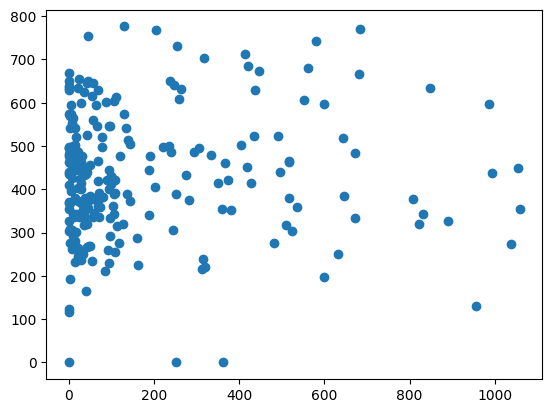

In [72]:
plt.scatter(train_covid["확진자"], train_covid["석식계"])

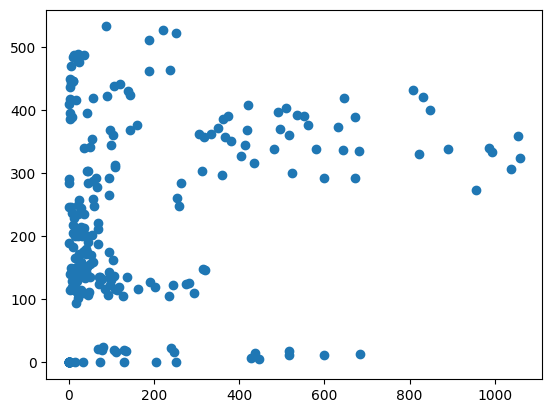

In [73]:
plt.scatter(train_covid["확진자"], train_covid["현본사소속재택근무자수"])

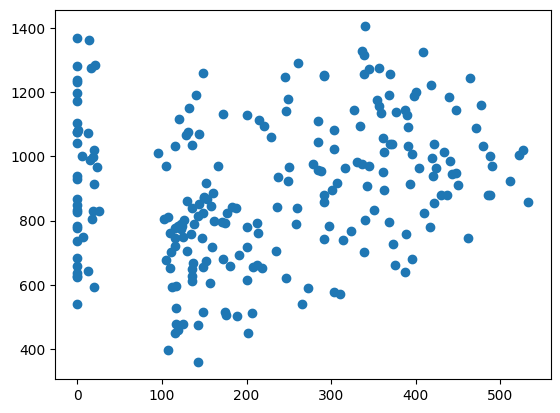

In [74]:
plt.scatter(train_covid["현본사소속재택근무자수"], train_covid["중식계"])

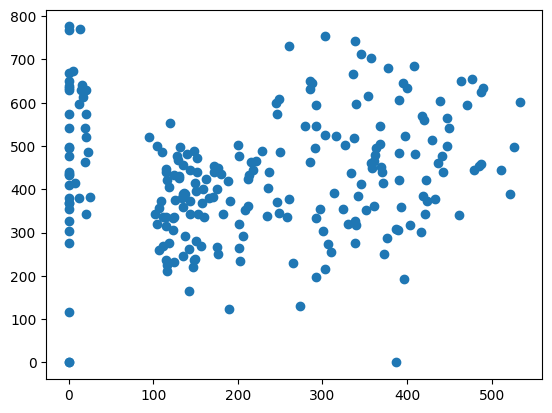

In [75]:
plt.scatter(train_covid["현본사소속재택근무자수"], train_covid["석식계"])